Certains points abordés ici serviront très peu ou seront abordés pendant l'année. Il s'agit d'approfondissement pour ceux qui ont déjà bien compris les parties précédentes.

In [1]:
"""On importe les bibliothèques scientifiques car elles seront utilisées ensuite"""
import numpy as np
import matplotlib.pyplot as plt


# La compréhension des listes

## Position du problème
On a vu que les listes classiques ne permettaient pas d'appliquer une fonction `f` à chaque élément en écrivant `f(L)` (`L` étant une liste classique). Cela a motivé l'utilisation des listes numpy. Néanmoins :
* On est quelques fois obligé d'utiliser les listes classiques
* La syntaxe `f(L)` ne fonctionne que si `f` est _vectorialisable_, c'est-à-dire programmée pour pouvoir s'appliquer à chaque élément.

```{admonition} Fonctions et opérateurs vectorialisables
:class: tip
Non exhaustif :
* Les opérateurs classiues `+,-,/,*` sont vectorialisables
* Les fonctions de la bibliothèques numpy (sin, cos, exp...) sont vectorialisables.
```

Un exemple fréquent est quand la fonction `f` fait appelle à un structure conditionnelle qui n'est pas vectorialisable. On reprend la fonction définie par morceau :

In [2]:
def fonction_morceau(x):
  if x < 3:  # Si x < 3
    a = x - 4
  elif x < 5:  # Si 3 <= x < 5
    a = x ** 2
  else:  # Si x >=5
    b = x + 4
    a = b ** 3
  return a

Impossible de l'appliquer directement à un vecteur numpy (pour la tracer par exemple:

In [3]:
x = np.linspace(0, 15, 1000)  # Vecteur de 1000 valeurs entre 0 et 15
y = fonction_morceau(x)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

`The truth value of an array with more than one element is ambiguous.` : Le message est clair : il cherche à travailler sur le vecteur et non sur chaque élément.

## Première solution
On peut écrire une boucle classique qui parcout tous les éléments de `x` et leur applique `fonction_morceau` :

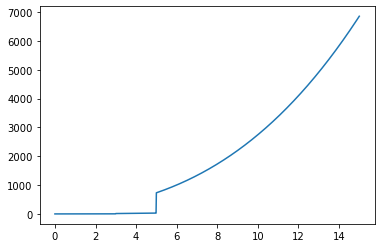

In [4]:
x = np.linspace(0, 15, 1000)
y = np.zeros(len(x))  # On crée un vecteur nul qu'on va remplir

for i in range(len(x)):  # i prendra les indices de 0 à len(x) - 1
  y[i] = fonction_morceau(x[i])  # On remplit l'élément d'indice i


"""On peut même le tracer"""
f, ax = plt.subplots()  # On ne va pas légender le graphique puisqu'il n'y a pas de contexte ici.
ax.plot(x, y)

plt.show()


## Utilisation de la compréhension des listes.
Une __liste en compréhension__ est une liste qui est obtenue par action (et/ou filtrage) de chaque élément d'une autre liste. La syntaxe est simple :

```python
L1 = [fonction(x) for x in L]  # L est une liste et L1 la nouvelle liste en compréhension
```

La syntaxe est assez clair : "Applique la `fonction` à `x` pour `x` qui parcourt chaque élément de `L`"

```{margin}
Ca fonction si `L` est un vecteur `numpy`

```

````{attention}
Cette méthode renvoie une liste __classique__, pas un vecteur `numpy`. Si vous voulez obtenir un vecteur numpy, il faudra utiliser la fonction `array` :
```python
L1 = np.array([fonction(x) for x in L])
```
````

A titre d'exemple :

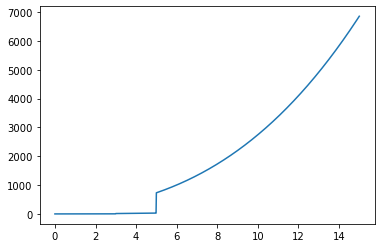

In [5]:
x = np.linspace(0, 15, 1000)
y = np.array([fonction_morceau(i) for i in x])


"""On peut même le tracer"""
f, ax = plt.subplots()  # On ne va pas légender le graphique puisqu'il n'y a pas de contexte ici.
ax.plot(x, y)

plt.show()


```{margin}
On peut aussi filtrer la liste pour n'appliquer `fonction(x)` que sous certaines conditions :

`[fonction(x) for x in L if x > 1]`

```